In [1]:
import pandas as pd
import numpy as np
df_games=pd.read_csv(r'D:\GUVI2\Data\games.csv')
df_sales=pd.read_csv(r'D:\GUVI2\Data\vgsales.csv')

In [2]:
df_games.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [3]:
df_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df_games=df_games.dropna()

In [5]:
df_sales=df_sales.dropna()

In [6]:
df_games=df_games.drop_duplicates()
df_sales=df_sales.drop_duplicates()

In [7]:
df_games.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [8]:
df_sales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [9]:
df_sales['Year'] = df_sales['Year'].dropna()

In [10]:
df_sales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
df_games.isnull().sum()

Unnamed: 0           0
Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [12]:
df_games['Release Date']=pd.to_datetime(df_games['Release Date'],errors='coerce')

In [13]:
#Converts the K and M values in the respective columns to numeric values

for col in ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']:
    df_games[col] = df_games[col].apply(lambda x: float(x[:-1]) * 1_000 if isinstance(x, str) and x.endswith('K')
                                        else float(x[:-1]) * 1_000_000 if isinstance(x, str) and x.endswith('M')
                                        else float(x) if pd.notnull(x) else x)


In [14]:
df_games.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2900.0,2900.0,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300.0,4300.0,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0
3,3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500.0,3500.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679.0,4900.0,1800.0
4,4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000.0,3000.0,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000.0,2400.0,8300.0,2300.0


In [15]:
df_games = df_games.drop(columns=['Unnamed: 0']) #Removing random unnamed column

In [16]:
df_games = df_games.drop(columns=['Reviews','Summary']) #Dropping irrelevant columns

In [17]:
import re
df_games['Genres'] = df_games['Genres'].apply(
    lambda x: re.sub(r'[^a-z, \s]', '', str(x).lower())  # Remove special chars and lowercase
) 

# Remove extra spaces and ensure proper comma separation
df_games['Genres'] = df_games['Genres'].apply(
    lambda x: re.sub(r'\s+', ' ', x)  # Replace multiple spaces with one
).apply(
    lambda x: re.sub(r'\s*,\s*', ',', x)  # Ensure no spaces around commas
).apply(
    lambda x: x.strip() )

In [18]:
# Clean the 'Team' column (apply regex)
df_games['Team'] = df_games['Team'].apply(
    lambda x: re.sub(r'[^a-z, \s]', '', str(x).lower())  # Remove special chars and lowercase
) 

# Remove extra spaces and ensure proper comma separation
df_games['Team'] = df_games['Team'].apply(
    lambda x: re.sub(r'\s+', ' ', x)  # Replace multiple spaces with one
).apply(
    lambda x: re.sub(r'\s*,\s*', ',', x)  # Ensure no spaces around commas
).apply(
    lambda x: x.strip()  # Strip leading/trailing spaces
)

In [19]:
df_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [20]:
import re
# Normalize Platform column
df_sales['Platform'] = df_sales['Platform'].apply(
    lambda x: re.sub(r'[^a-z\s]', '', str(x).lower())  # Remove special chars and lowercase
)

In [21]:
df_sales.rename(columns={'Name': 'Title'}, inplace=True)

In [22]:
#MErging games and sales data to form merged data
df_merged=pd.merge(df_games,df_sales, on='Title',how='inner')

In [23]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1329 non-null   object        
 1   Release Date       1329 non-null   datetime64[ns]
 2   Team               1329 non-null   object        
 3   Rating             1329 non-null   float64       
 4   Times Listed       1329 non-null   float64       
 5   Number of Reviews  1329 non-null   float64       
 6   Genres             1329 non-null   object        
 7   Plays              1329 non-null   float64       
 8   Playing            1329 non-null   float64       
 9   Backlogs           1329 non-null   float64       
 10  Wishlist           1329 non-null   float64       
 11  Rank               1329 non-null   int64         
 12  Platform           1329 non-null   object        
 13  Year               1329 non-null   float64       
 14  Genre   

In [24]:
df_merged = df_merged.drop(columns=['Genres']) #Dropping irrelevant columns

In [25]:
df_merged.isnull().sum()

Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
Rank                 0
Platform             0
Year                 0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

In [26]:
df_merged.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Minecraft,2011-11-18,mojang studios,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,73,x,2013.0,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
1,Minecraft,2011-11-18,mojang studios,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,169,ps,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
2,Minecraft,2011-11-18,mojang studios,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,298,ps,2014.0,Misc,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
3,Minecraft,2011-11-18,mojang studios,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,644,xone,2014.0,Misc,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
4,Minecraft,2011-11-18,mojang studios,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,715,psv,2014.0,Misc,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25


In [27]:
df_merged.columns

Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Rank',
       'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [28]:
#Creating the SQL Dataase for the same
import mysql.connector
connection=mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sadguro161092",
    

)
cursor=connection.cursor()

In [29]:
cursor.execute('''CREATE DATABASE IF NOT EXISTS games_db''')

In [30]:
cursor.execute(''' USE games_db''')

In [31]:
cursor.execute(''' 
CREATE TABLE IF NOT EXISTS games_metadat(
    title VARCHAR(500),
    release_date DATE,
    team VARCHAR(500),
    rating FLOAT,
    times__listed FLOAT,
    number_of_reviews FLOAT,
    genres VARCHAR(500),
    plays FLOAT,
    playing FLOAT,
    backlogs FLOAT,
    wishlist FLOAT
                   
               
               
               
               
               
               
               
               );



''')
#Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
 #      'Number of Reviews', 'Genres', 'Plays', 'Playing', 'Backlogs',
#       'Wishlist'],
 #     dtype='object')

In [32]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1498 non-null   object        
 1   Release Date       1496 non-null   datetime64[ns]
 2   Team               1498 non-null   object        
 3   Rating             1498 non-null   float64       
 4   Times Listed       1498 non-null   float64       
 5   Number of Reviews  1498 non-null   float64       
 6   Genres             1498 non-null   object        
 7   Plays              1498 non-null   float64       
 8   Playing            1498 non-null   float64       
 9   Backlogs           1498 non-null   float64       
 10  Wishlist           1498 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 140.4+ KB


In [33]:
#Inserting data into the games_data table in SQL
insert_query=''' 
INSERT INTO games_metadat( 
    title,
    release_date,
    team,
    rating,
    times__listed,
    number_of_reviews,
    genres,
    plays,
    playing,
    backlogs,
    wishlist
               
               
    )
    VALUES( %s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)


'''

for _, row in df_games.iterrows():
    cursor.execute(insert_query, tuple(row))
connection.commit()

In [34]:
cursor.execute('''

CREATE TABLE IF NOT EXISTS sales_data(
    game_rank INT,
    title VARCHAR(500),
    platform VARCHAR(500),
    year YEAR,
    genre VARCHAR(500),
    publisher VARCHAR(500),
    na_sales FLOAT,
    eu_sales FLOAT,
    jp_sales FLOAT,
    other_sales FLOAT,
    global_sales FLOAT
               
               
               
               
               );





 ''')
#Index(['Rank', 'Title', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
#       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
#      dtype='object')

In [35]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Title         16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [36]:
#Inserting data into the sales_data table in SQL
insert_query=''' 
INSERT INTO sales_data( 
    game_rank,
    title,
    platform,
    year,
    genre,
    publisher,
    na_sales,
    eu_sales,
    jp_sales,
    other_sales,
    global_sales
               
               
    )
    VALUES( %s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)


'''

for _, row in df_sales.iterrows():
    cursor.execute(insert_query, tuple(row))
connection.commit()

In [37]:
#Creating the merged_data table in SQL
cursor.execute(''' 
CREATE TABLE IF NOT EXISTS merged_data(
    title VARCHAR(500),
    release_date DATE,
    team VARCHAR(500),                
    rating FLOAT,
    times_listed FLOAT,
    number_of_reviews FLOAT,
    plays FLOAT,
    playing FLOAT,
    backlogs FLOAT,
    wishlist FLOAT,
    game_rank INT,
    platform VARCHAR(500),
    year FLOAT,
    genre VARCHAR(500),
    publisher VARCHAR(500),
    na_sales FLOAT,
    eu_sales FLOAT,
    jp_sales FLOAT,
    other_sales FLOAT,
    global_sales FLOAT             
               
                
    );





''')
#Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
#       'Number of Reviews', 'Genres', 'Plays', 'Playing', 'Backlogs',
#       'Wishlist', 'Rank', 'Platform', 'Year', 'Genre', 'Publisher',
#       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
#      dtype='object')

In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1329 non-null   object        
 1   Release Date       1329 non-null   datetime64[ns]
 2   Team               1329 non-null   object        
 3   Rating             1329 non-null   float64       
 4   Times Listed       1329 non-null   float64       
 5   Number of Reviews  1329 non-null   float64       
 6   Plays              1329 non-null   float64       
 7   Playing            1329 non-null   float64       
 8   Backlogs           1329 non-null   float64       
 9   Wishlist           1329 non-null   float64       
 10  Rank               1329 non-null   int64         
 11  Platform           1329 non-null   object        
 12  Year               1329 non-null   float64       
 13  Genre              1329 non-null   object        
 14  Publishe

In [39]:
#Inserting data into the merged_data table in SQL
insert_query=''' 
INSERT INTO merged_data( 
    title,
    release_date,
    team,                
    rating,
    times_listed,
    number_of_reviews,
    plays,
    playing,
    backlogs,
    wishlist,
    game_rank,
    platform,
    year,
    genre,
    publisher,
    na_sales,
    eu_sales,
    jp_sales,
    other_sales,
    global_sales  
               
               
    )
    VALUES( %s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)


'''

for _, row in df_merged.iterrows():
    cursor.execute(insert_query, tuple(row))
connection.commit()

In [40]:
df_games.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"bandai namco entertainment,fromsoftware",4.5,3900.0,3900.0,"adventure,rpg",17000.0,3800.0,4600.0,4800.0
1,Hades,2019-12-10,supergiant games,4.3,2900.0,2900.0,"adventure,brawler,indie,rpg",21000.0,3200.0,6300.0,3600.0
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"nintendo,nintendo epd production group no",4.4,4300.0,4300.0,"adventure,rpg",30000.0,2500.0,5000.0,2600.0
3,Undertale,2015-09-15,"tobyfox,",4.2,3500.0,3500.0,"adventure,indie,rpg,turn based strategy",28000.0,679.0,4900.0,1800.0
4,Hollow Knight,2017-02-24,team cherry,4.4,3000.0,3000.0,"adventure,indie,platform",21000.0,2400.0,8300.0,2300.0


VISUALIZATIONS

USING MATPLOTLIB AND SEABORN

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

GAMES

1. What are the top-rated games by user reviews?

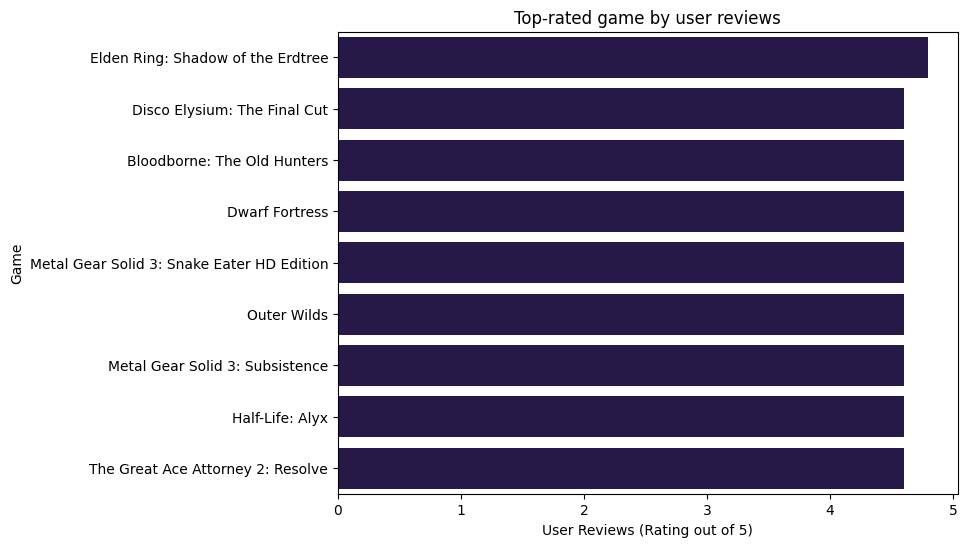

In [80]:
top_rated=df_games.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x='Rating', y='Title', data=top_rated)
plt.title('Top-rated game by user reviews')
plt.xlabel('User Reviews (Rating out of 5)')
plt.ylabel('Game')
plt.show()


2. Which developers (Teams) have the highest average ratings?

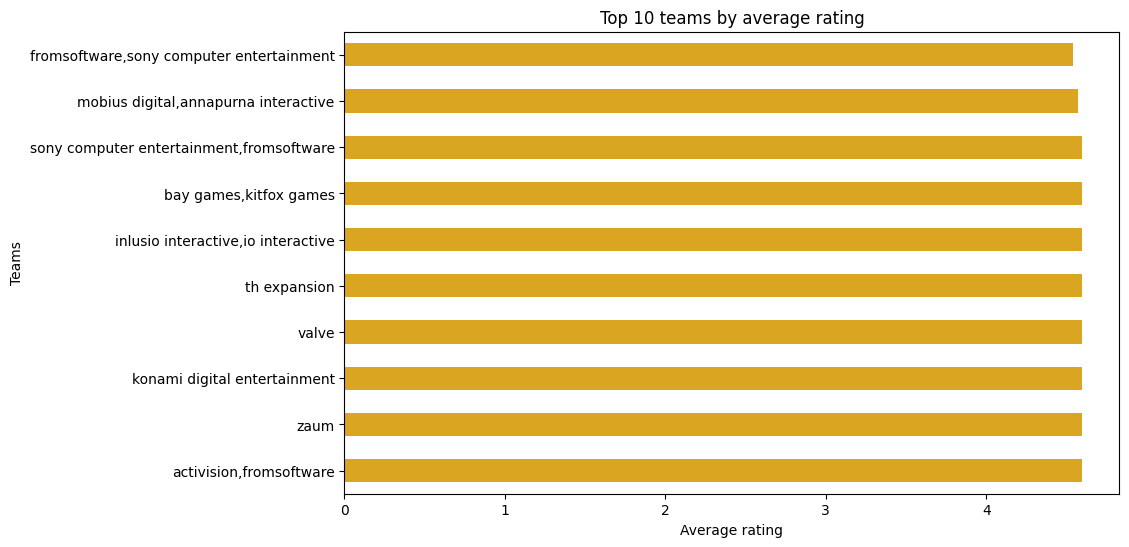

In [43]:
top_teams=df_games.groupby('Team')['Rating'].mean().sort_values( ascending=False).head(10)
plt.figure(figsize=(10,6))
top_teams.plot(kind='barh',color='goldenrod')
plt.title("Top 10 teams by average rating")
plt.xlabel('Average rating')

plt.ylabel('Teams')
plt.show()

3.What are the most common genres in the dataset?

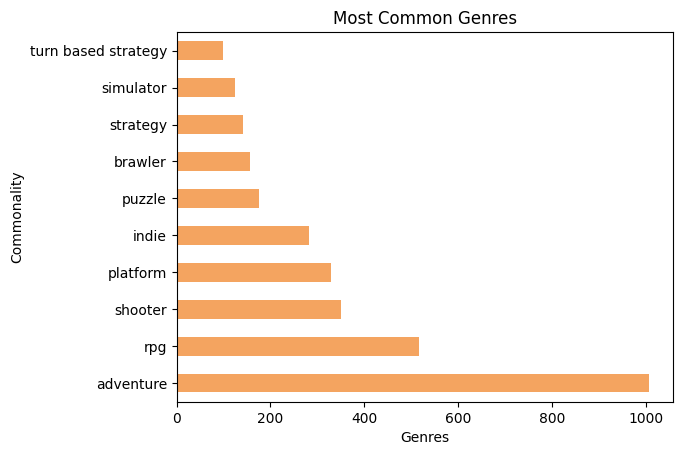

In [44]:
g=df_games['Genres'].str.split(',').explode().str.strip()
g.value_counts().head(10).plot(kind='barh', color='sandybrown')
plt.title('Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Commonality')
plt.show()


4. Which games have the highest backlog compared to wishlist?

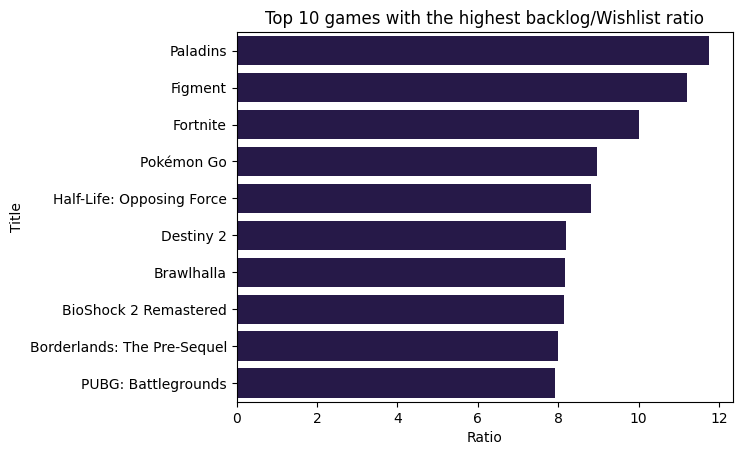

In [74]:
df=df_games.copy()
df['Ratio']=df['Backlogs']/df['Wishlist']
top_ratio=df.sort_values(by='Ratio', ascending=False).head(10)
import seaborn as sns
sns.set_palette('magma')
sns.barplot(x='Ratio', y='Title', data=top_ratio, orient='h')

plt.title("Top 10 games with the highest backlog/Wishlist ratio")
plt.xlabel("Ratio")
plt.show()

5. What is the game release trend across year

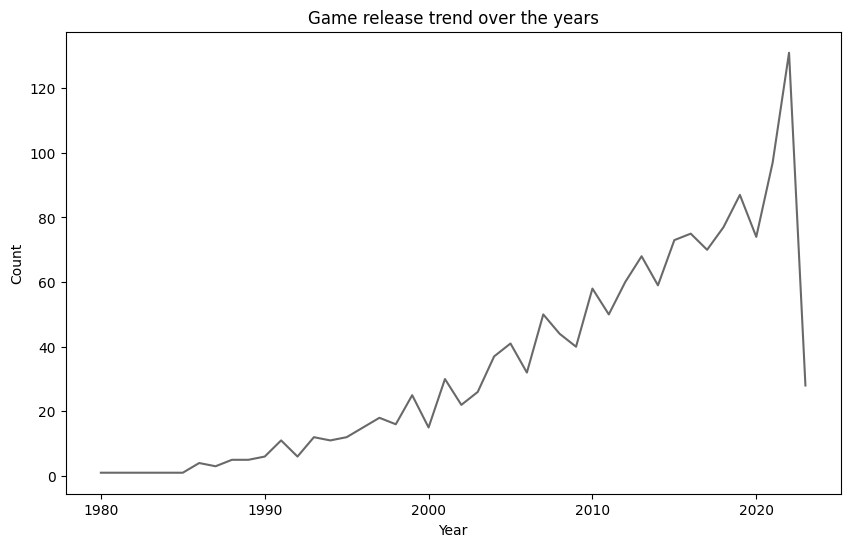

In [46]:
df['Year']=df['Release Date'].dt.year
year_count=df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
year_count.plot(kind='line', color='dimgray')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Game release trend over the years')
plt.show()

6. What is the distribution of user ratings?

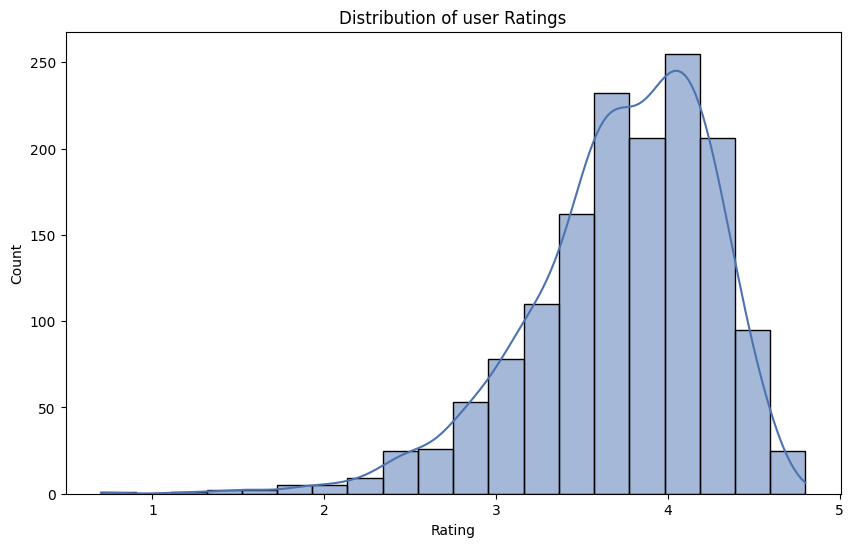

In [47]:
plt.figure(figsize=(10,6))
sns.set_palette("deep")
sns.histplot(df_games['Rating'],bins=20,kde=True)
plt.title("Distribution of user Ratings")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

7. What are the top 10 most wishlisted games?

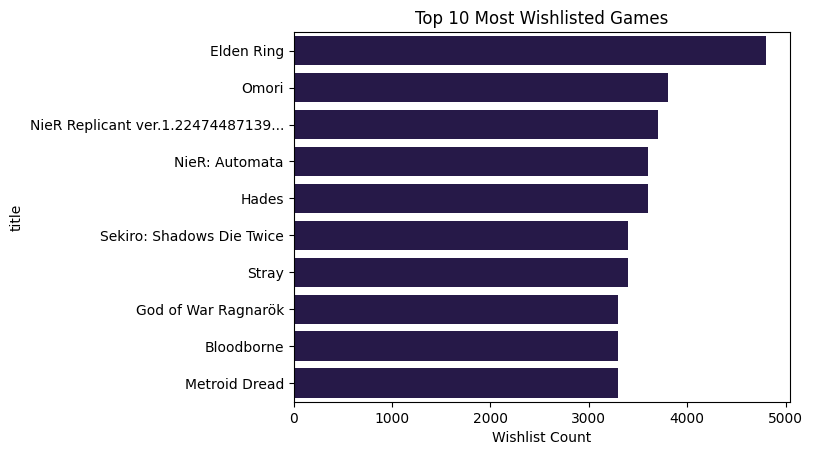

In [48]:
df['Title']=df['Title'].str.strip()
top_wishlist=df.sort_values(by='Wishlist', ascending=False).drop_duplicates(subset='Title').head(10)


sns.set_palette('magma')
sns.barplot(x='Wishlist',y='Title', data=top_wishlist, order=top_wishlist['Title'])
plt.title('Top 10 Most Wishlisted Games')
plt.xlabel('Wishlist Count')
plt.ylabel('title')
plt.show()

8. What’s the average number of plays per genre?

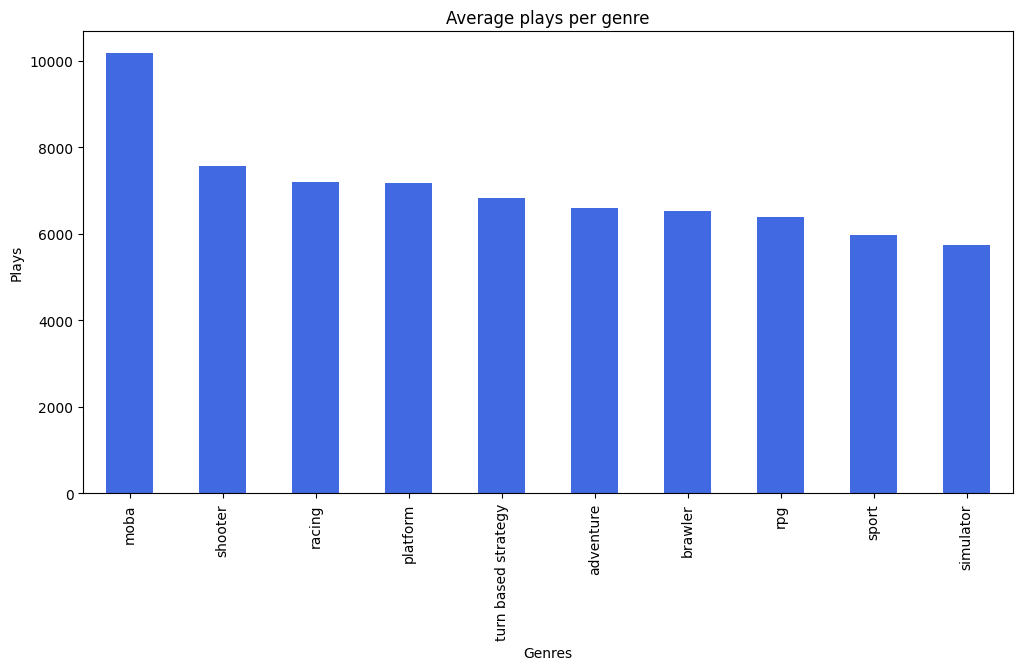

In [83]:
df_exploded=df_games.copy()
df_exploded['Genres']=df_exploded['Genres'].str.split(',')
df_exploded=df_exploded.explode('Genres')
df_exploded['Genres']=df_exploded['Genres'].str.strip()
avg_plays=df_exploded.groupby('Genres')['Plays'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))

avg_plays.plot(kind='bar', color='royalblue')

plt.title('Average plays per genre')
plt.xlabel('Genres')
plt.ylabel('Plays')
plt.xticks(rotation=90)
plt.show()

9. Which developer studios are the most productive and impactful?

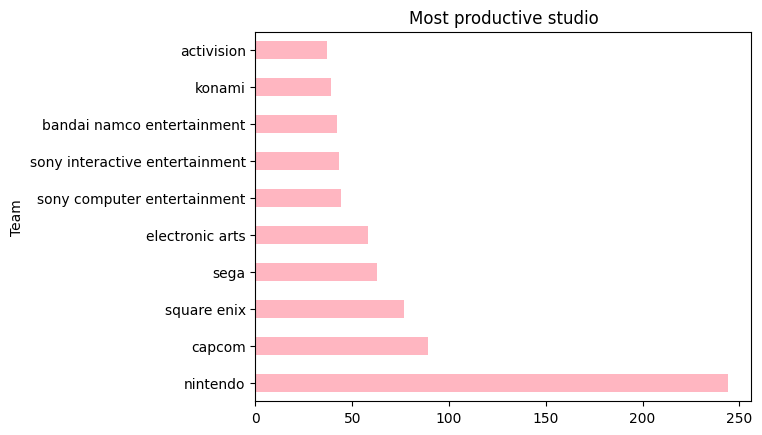

In [50]:
#Assumption: 
#Productive: Most rgames released 
#Impactful: Highest rating
productive=df['Team'].dropna().str.split(r'\s*,\s*', regex=True).explode().value_counts().head(10)

plt.title('Most productive studio')
productive.plot(kind='barh',color='lightpink')
plt.show()



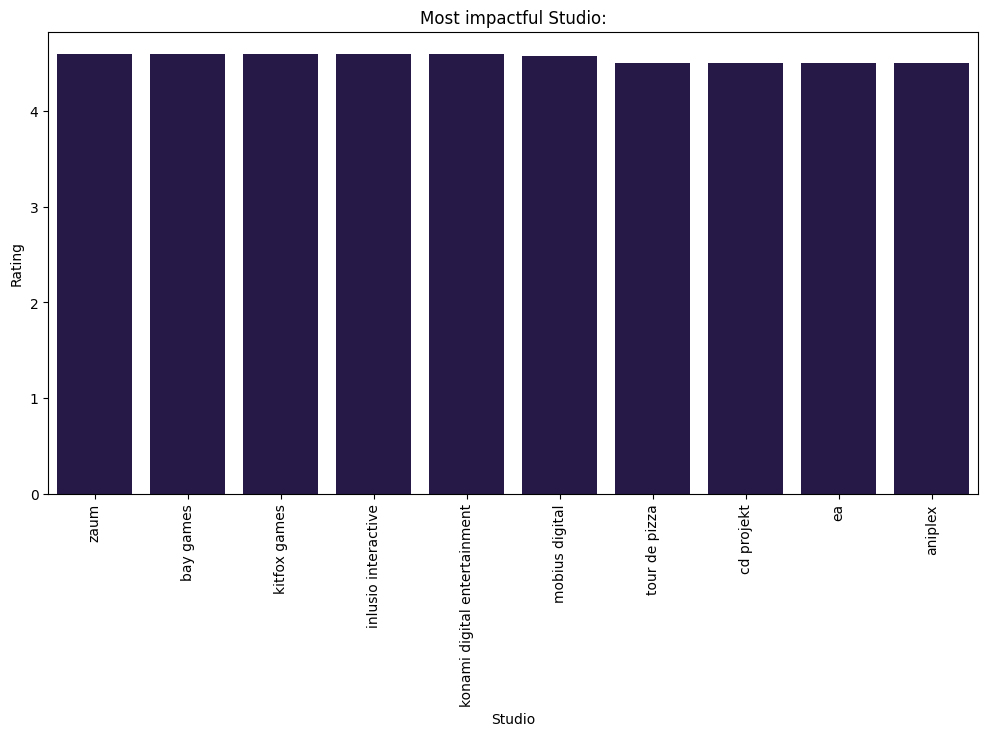

In [77]:
#Imactful code:
impactful=df.copy()
sns.set_palette('magma')
impactful['Team']=impactful['Team'].dropna().str.split(r'\s*,\s*',regex=True)
impactful=impactful.explode('Team')
impactful_avg=impactful.groupby('Team')['Rating'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,6))
plt.title('Most impactful Studio:')
plt.xlabel('Studio')
plt.xticks(rotation=90)
sns.barplot(x='Team',y='Rating', data=impactful_avg)
plt.show()

SALES

10. Which region generates the most game sales?

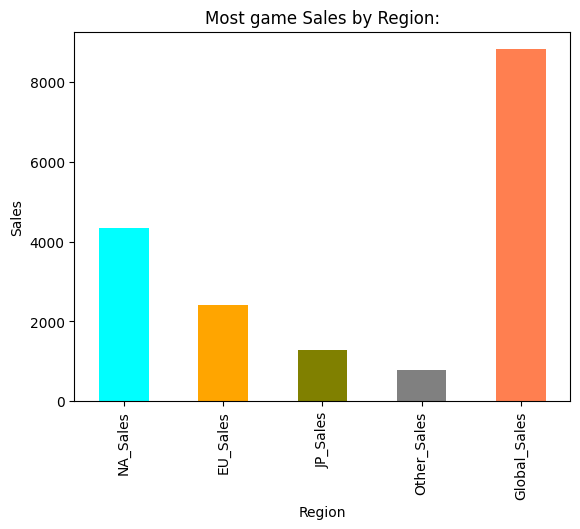

In [52]:
sales=df_sales[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()

plt.title('Most game Sales by Region:')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
sales.plot(kind='bar', color=['cyan', 'orange', 'olive','gray', 'coral'])
plt.show()

11. What are the best-selling platforms?


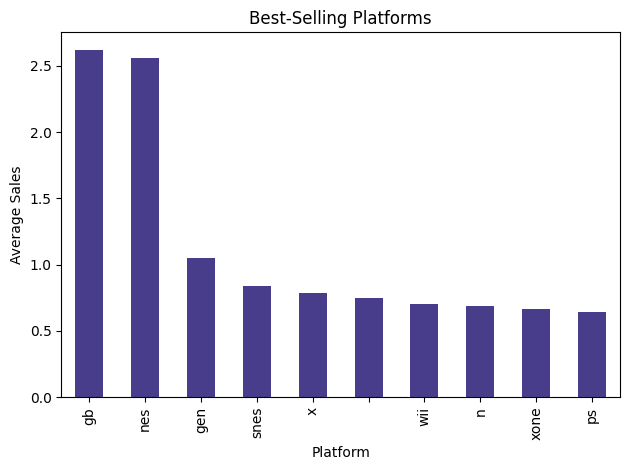

In [53]:

best_platform=df_sales.groupby('Platform')['Global_Sales'].mean()\
    .sort_values(ascending=False).head(10)

plt.xlabel('Platform')
plt.ylabel('Average Sales')
best_platform.plot(kind='bar', color='darkslateblue')
plt.title("Best-Selling Platforms")
plt.tight_layout()
plt.show()

12. What’s the trend of game releases and sales over years?

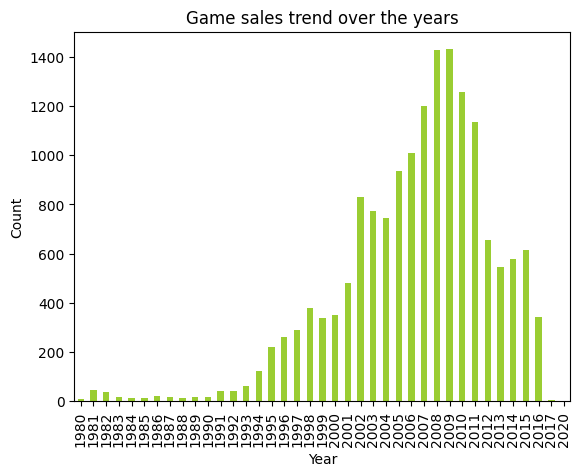

In [54]:
df2=df_sales.copy()
df2['Year']=df2['Year'].astype(int)
yearly_trend=df2['Year'].value_counts().sort_index()
yearly_trend.plot(kind='bar', color='yellowgreen')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Game sales trend over the years')
plt.show()

13.  Who are the top publishers by sales

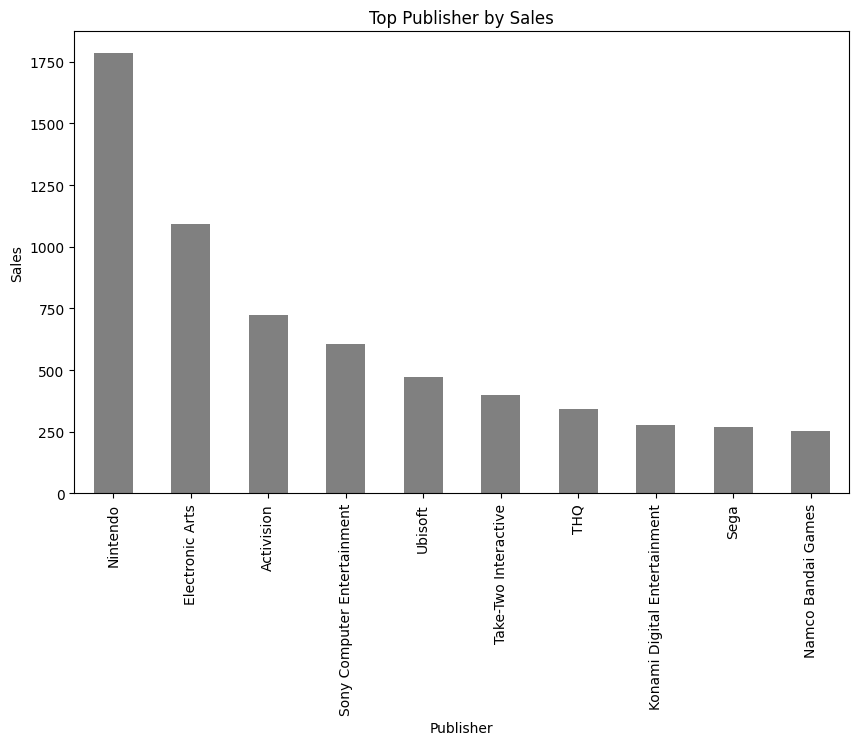

In [55]:
top_publisher=df_sales.groupby('Publisher')['Global_Sales'].sum()\
        .sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_publisher.plot(kind='bar',color='gray')
plt.title('Top Publisher by Sales')
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.show()

14.  Which games are the top 10 best-sellers globally?

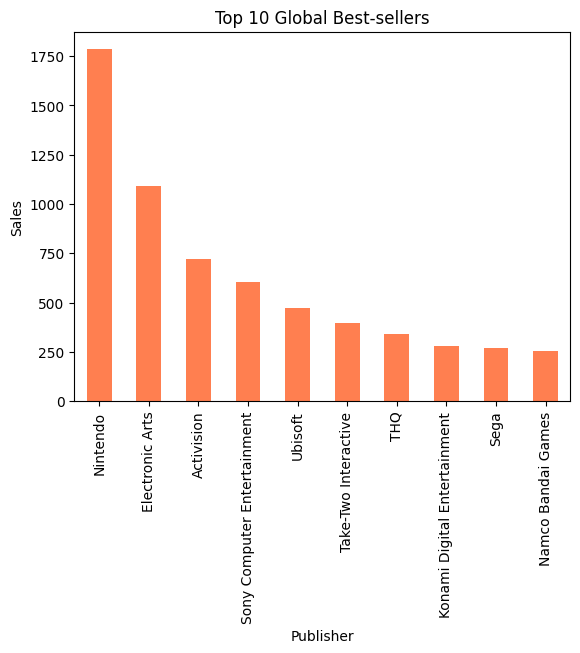

In [56]:
best_seller=df_sales.groupby('Publisher')['Global_Sales'].sum()\
            .sort_values(ascending=False).head(10)
plt.title('Top 10 Global Best-sellers')
plt.xlabel('Publisher')
plt.ylabel('Sales')
best_seller.plot(kind='bar', color='coral')
plt.show()

15. How do regional sales compare for specific platforms?

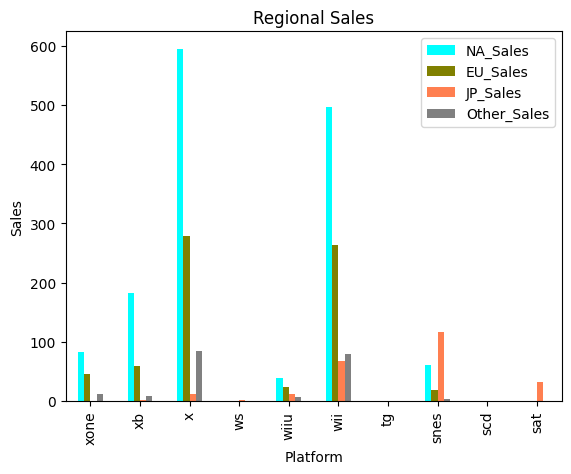

In [57]:
regional_sales=df2.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(by='Platform',ascending=False).head(10)
regional_sales.plot(kind='bar', color=['cyan','olive','coral','gray'])
plt.title('Regional Sales')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()


16. How has the market evolved by platform over time?

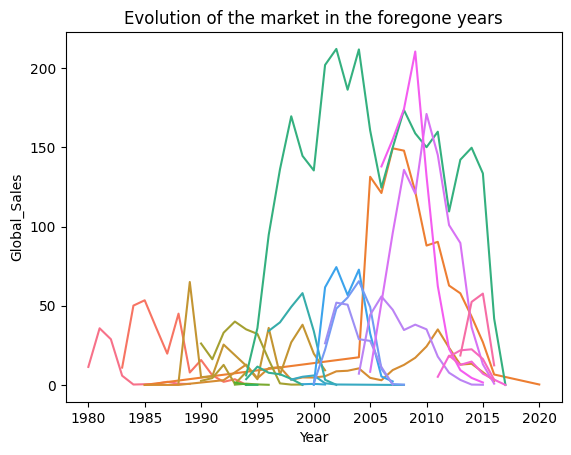

In [58]:
df2['Year']=df2['Year'].astype(int)
top_platform=df2.groupby(['Year','Platform'])['Global_Sales'].sum().reset_index()
sns.lineplot(data=top_platform, x='Year', y='Global_Sales', hue='Platform')
plt.title("Evolution of the market in the foregone years")
plt.legend().set_visible(False)
plt.show()





17.  What are the regional genre preferences?

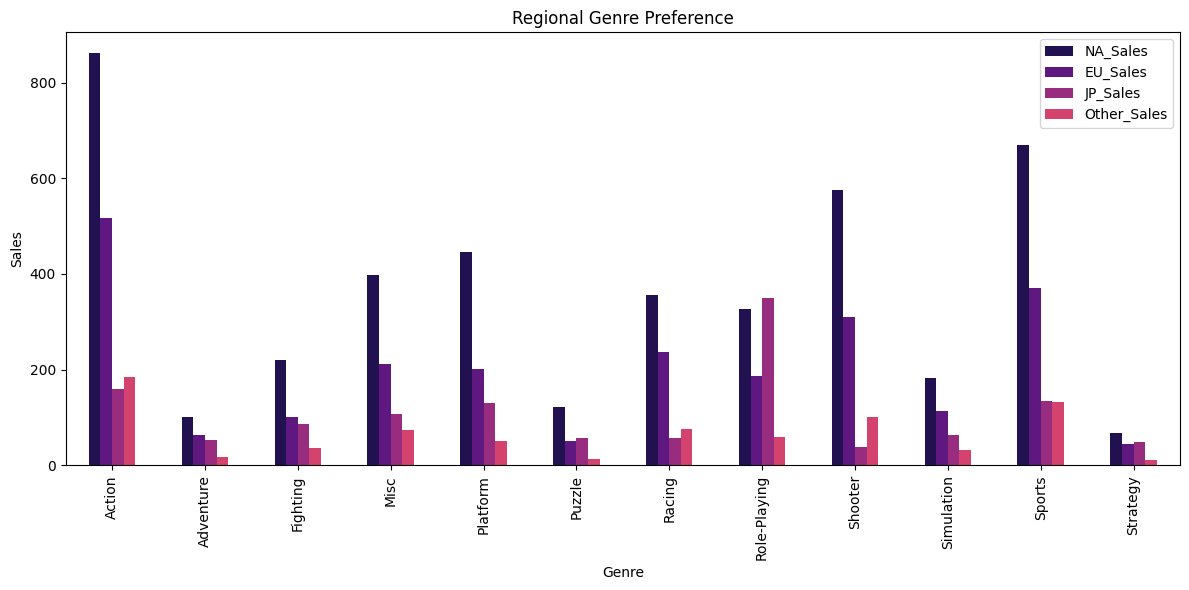

In [78]:
genre_pref=df2.copy()
genre_pref['Genre']=genre_pref['Genre'].str.split(',')
genre_pref=genre_pref.explode('Genre')


regional_genre=genre_pref.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
regional_genre.plot(kind='bar', figsize=(12,6))
plt.title('Regional Genre Preference')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

18. What’s the yearly sales change per region?

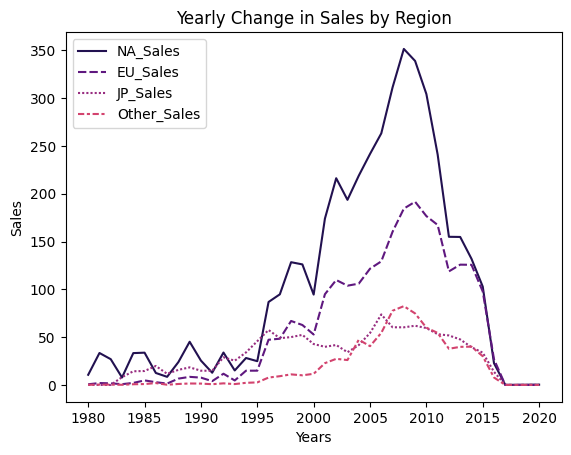

In [60]:
yearly_change=df2.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
sns.lineplot(data=yearly_change)
plt.title('Yearly Change in Sales by Region')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

19. What is the average sales per publisher?

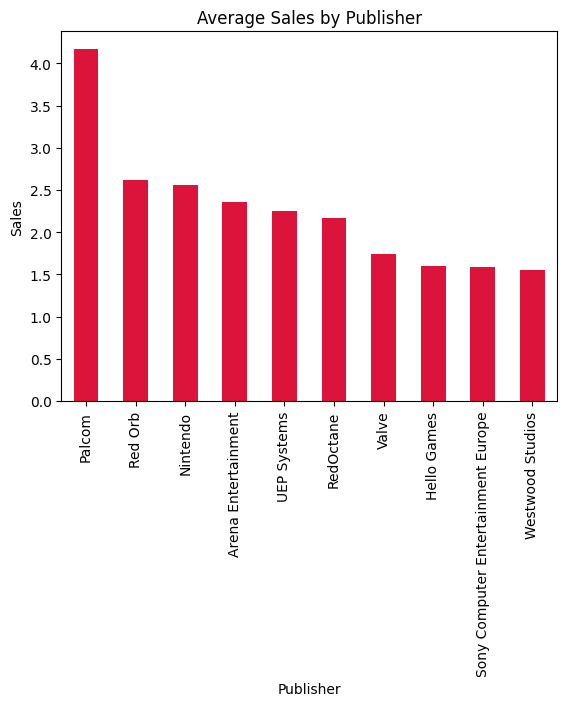

In [61]:
avg_sales=df2.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)
avg_sales.plot(kind='bar', color='crimson')

plt.title("Average Sales by Publisher")
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.show()

20.  What are the top 5 best-selling games per platform?


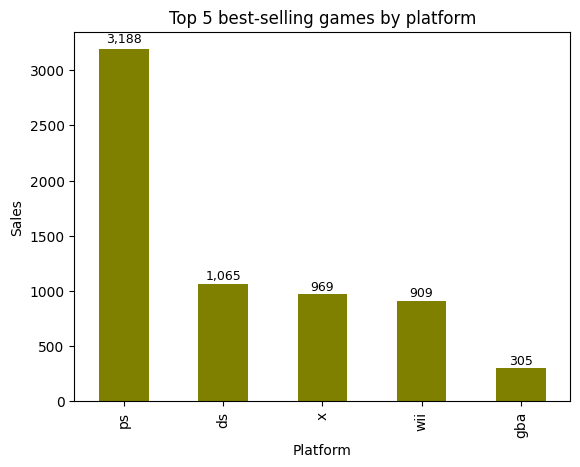

In [62]:
top_games=df2.groupby('Platform')['Global_Sales'].sum().sort_values( ascending=False).head(5)
for i,value in enumerate(top_games):
    plt.text(i, value+value*0.01,f'{int(value):,}', ha='center',va='bottom',fontsize=9)
plt.title('Top 5 best-selling games by platform')
plt.xlabel('Platform')
plt.ylabel('Sales')
top_games.plot(kind='bar', color='Olive')
plt.show()

MERGED DATA

21.Which game genres generate the most global sales?

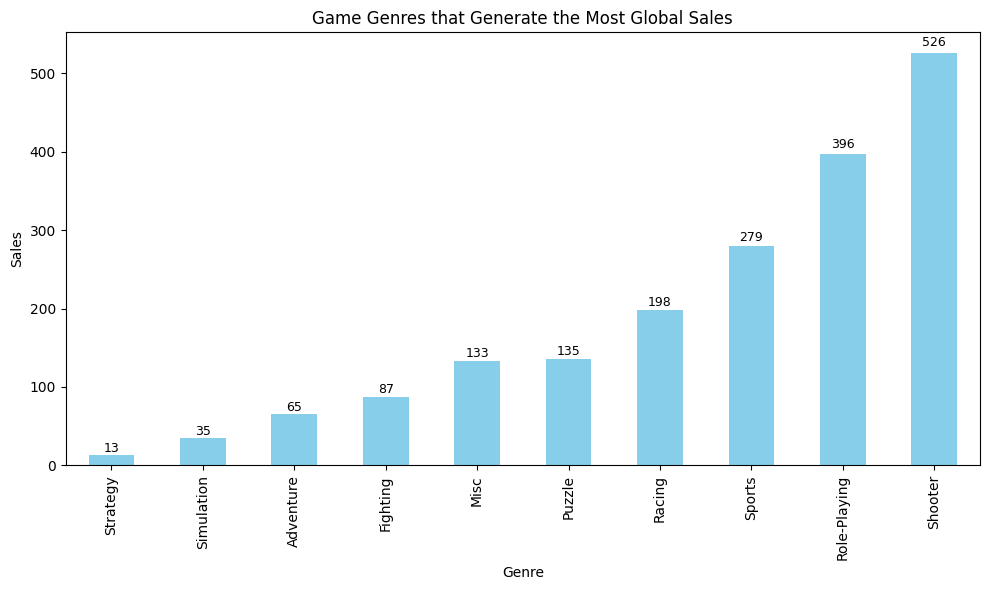

In [63]:
df3=df_merged.copy()
genre_sales=df3.groupby('Genre')['Global_Sales'].sum().sort_values().head(10)
genre_sales.plot(kind='bar', figsize=(10,6), color='skyblue')
for i,value in enumerate(genre_sales):
    plt.text(i, value+value*0.01,f'{int(value):,}', ha='center',va='bottom',fontsize=9)
plt.title('Game Genres that Generate the Most Global Sales')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

22.  How does user rating affect global sales?

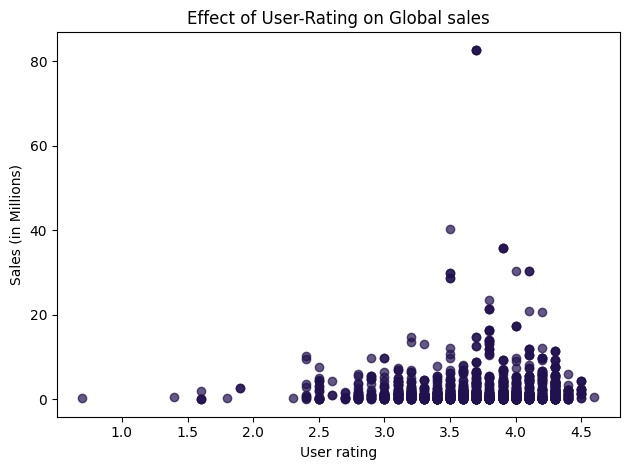

In [64]:
plt.scatter(df3['Rating'], df3['Global_Sales'], alpha=0.7)
plt.title('Effect of User-Rating on Global sales')
plt.xlabel('User rating')
plt.ylabel('Sales (in Millions)')
plt.tight_layout()
plt.show()

23. Which platforms have the most games with high ratings (e.g., above 4)?

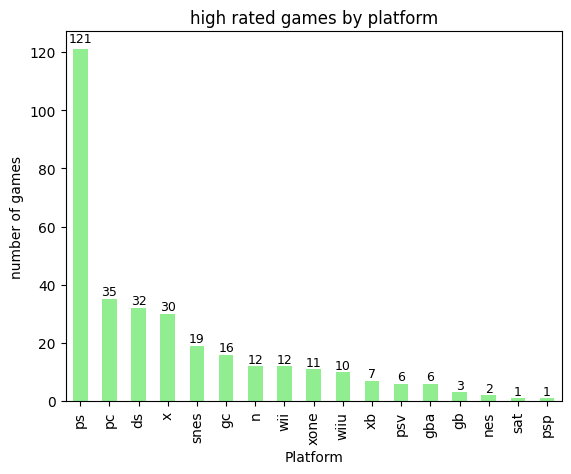

In [65]:
high_rated=df3[df3['Rating']>4]
platform_high_r=high_rated['Platform'].value_counts()
platform_high_r.plot(kind='bar', color='lightgreen')
for i,value in enumerate(platform_high_r):
    plt.text(i, value+value*0.01,f'{int(value):,}', ha='center',va='bottom',fontsize=9)
plt.title('high rated games by platform')
plt.ylabel('number of games')
plt.show()

24. What’s the trend of releases and sales over time?

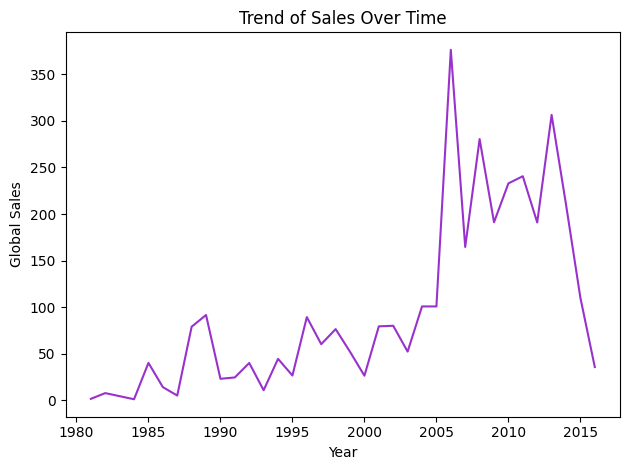

In [66]:
year=df3['Year'].astype(int)
sales_trend=df3.groupby('Year')['Global_Sales'].sum()
sales_trend.plot(kind='line',color='darkorchid')
plt.title('Trend of Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.tight_layout()
plt.show()

25. Do highly wishlisted games lead to more sales? 

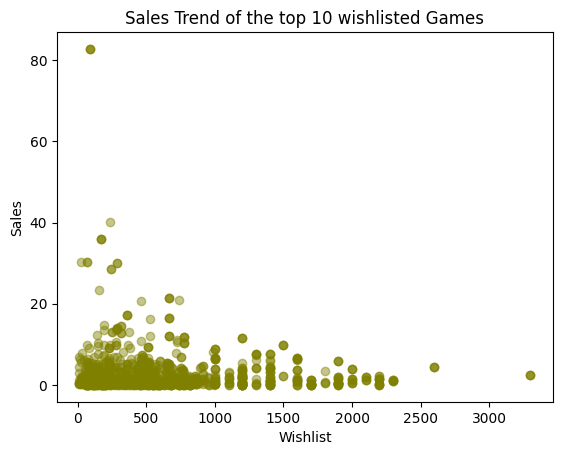

In [67]:
plt.scatter(df3['Wishlist'],df3['Global_Sales'], alpha=0.45, color='olive')
plt.title('Sales Trend of the top 10 wishlisted Games')
plt.xlabel('Wishlist')
plt.ylabel('Sales')
plt.show()

26.  Which genres have the highest engagement but lowest sales?

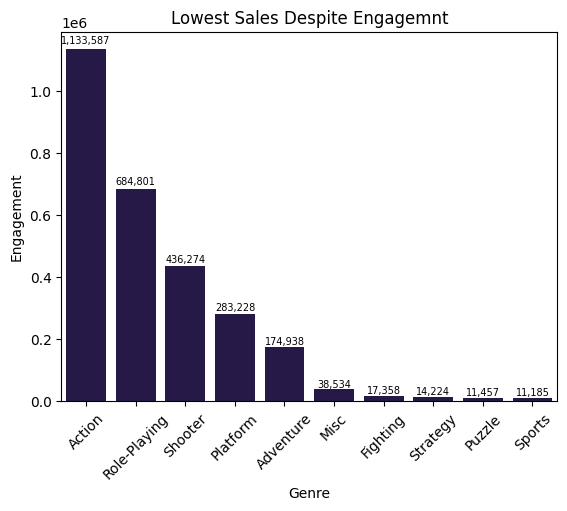

In [79]:
df3['Engagement']=df3['Wishlist']+df3['Backlogs']
engagement=df3.groupby('Genre')['Engagement'].sum().sort_values(ascending=False).head(10)
sns.barplot(engagement)
for i,value in enumerate(engagement):
    plt.text(i, value+value*0.01,f'{int(value):,}', ha='center',va='bottom',fontsize=7)
plt.title('Lowest Sales Despite Engagemnt')
plt.xticks(rotation=45)
plt.show()

27. Do highly listed games (wishlist/backlogs) correlate with better ratings?

Text(0.5, 1.0, 'Engagaemnt V/S Rating')

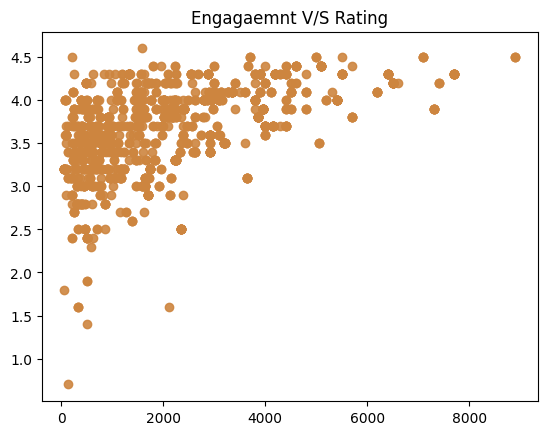

In [69]:
df3['Engagement']=df3['Wishlist']+df3['Backlogs']
plt.scatter(df3['Engagement'], df3['Rating'],alpha=0.9, color='peru')
plt.title('Engagaemnt V/S Rating')



28. How does user engagement differ across genres?

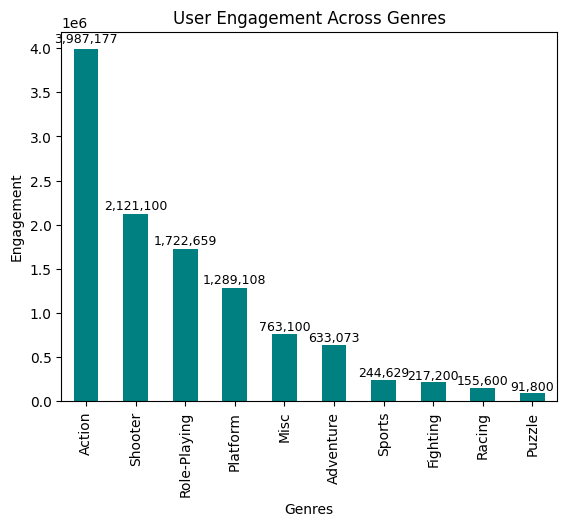

In [70]:
gen=df3.copy()
gen['Genre']=gen['Genre'].str.split(',').explode().str.strip()
engagement=gen.groupby('Genre')['Plays'].sum().sort_values(ascending=False).head(10)
engagement.plot(kind='bar', color='teal')
for i, value in enumerate(engagement):
    plt.text(i,value+value*0.01,f'{int(value):,}', ha='center', va='bottom', fontsize=9)
plt.title('User Engagement Across Genres')
plt.xlabel('Genres')
plt.ylabel('Engagement')
plt.show()

29. What are the top-performing combinations of Genre + Platform?

Text(0, 0.5, 'Performance')

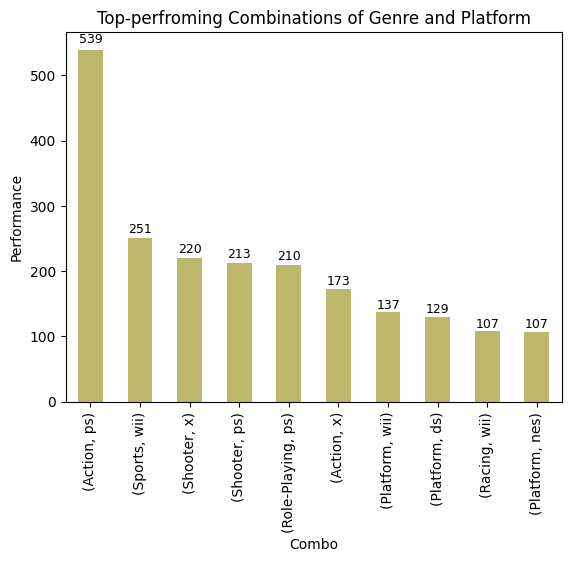

In [71]:
combo=df3.copy()
combo['Genre']=combo['Genre'].str.split(',').explode().str.strip()
top_combo=combo.groupby(['Genre','Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_combo.plot(kind='bar', color='darkkhaki')
for i,value in enumerate(top_combo):
    plt.text(i, value+value*0.01,f'{int(value):,}', ha='center',va='bottom',fontsize=9)
plt.title("Top-perfroming Combinations of Genre and Platform")
plt.xlabel('Combo')
plt.ylabel('Performance')

30. What does a regional sales heatmap by genre reveal?

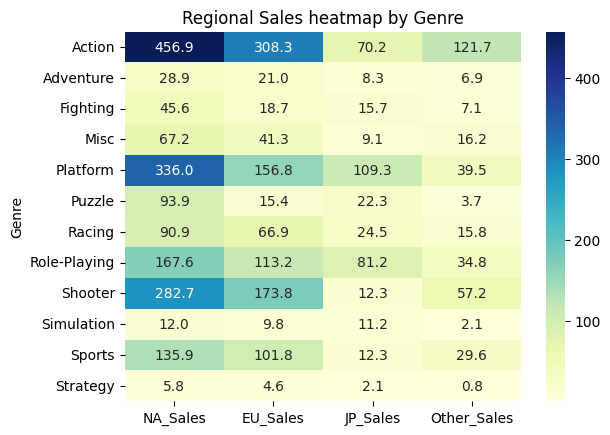

In [72]:
heatmap_data=df3.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Regional Sales heatmap by Genre')
plt.show()